In [108]:
# %load "quadrature.py"
class Quadrature:
    @staticmethod
    def computeMean(z, Wi, y):
        return np.dot(np.dot(z.T, Wi), y)[0][0]

    @staticmethod
    def computeVariance(gp, z, Wi, A, B, I):
        lsq = gp.kern.lengthscale[0]
        w = gp.kern.variance[0]
        determ = np.linalg.det(2 * np.dot(np.linalg.inv(A), B) + I) ** (-0.5)
        return w * determ - np.dot(np.dot(z.T, Wi), z)

    @staticmethod
    def computeZ(gp, X, i, A, B, b, I):
        x = X[i, :]
        lsq = gp.kern.lengthscale[0]
        w = gp.kern.variance[0]
        determ = np.linalg.det(np.dot(np.linalg.inv(A), B) + I) ** (-0.5)
        expon = np.exp(-0.5 * np.dot(np.dot((x - b), np.linalg.inv(A + B)), (x - b).T))
        return w * determ * expon

    @staticmethod
    def integrate(gp, b, v):
        dim = gp.X.shape[1]
        A = gp.kern.lengthscale[0] * np.diag(np.ones(dim))
        B = v * np.diag(np.ones(dim))
        b = b
        I = np.identity(dim)
        X = gp.X
        Y = gp.Y

        K = gp.kern.K(X)
        Ky = K.copy()
        Wi, LW, LWi, W_logdet = GPy.util.linalg.pdinv(Ky)

        z = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            z[i, :] = Quadrature.computeZ(gp, X, i, A, B, b, I)
        return (Quadrature.computeMean(z, Wi, Y), Quadrature.computeVariance(gp, z, Wi, A, B, I))

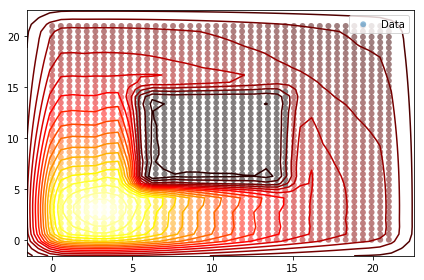

In [94]:
p.VPGS[-1].plot()

In [99]:
gp = p.VPGS[-1]
X = gp.X
K = gp.kern.K(X)
o = np.array

In [105]:
gp.X

ObsAr([[ 5.92307692,  0.53846154],
       [14.53846154,  1.61538462],
       [16.69230769, 11.84615385],
       ...,
       [ 7.        ,  2.15384615],
       [ 4.84615385,  1.61538462],
       [ 7.        , 10.76923077]])

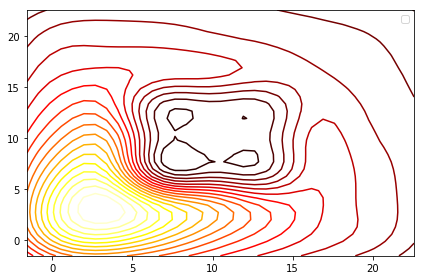

In [115]:
gp.plot_f()

In [110]:
gp.optimize()
Quadrature.integrate(gp,np.array([[2.0,2.0]]),1.0)

(78174.26941273687, array([[-2296747.46193649]]))

In [29]:
import numpy as np
import scipy.stats
import scipy.optimize as optim

# import the bayesian quadrature object
from bayesian_quadrature import BQ
from gp import GaussianKernel

# seed the numpy random generator, so we always get the same randomness
np.random.seed(8706)

In [101]:
options = {
    'n_candidate': 10,
    'x_mean': 0.0,
    'x_var': 10.0,
    'candidate_thresh': 0.5,
    'kernel': GaussianKernel,
    'optim_method': 'L-BFGS-B'
}
bq = BQ(np.array([0.0,1.0]),np.array([2.0,2.0]), **options)
bq.init(params_tl=(1, 1, 0), params_l=(1, 1, 0))


(<matplotlib.figure.Figure at 0x111b92050>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x111baf710>,
       dtype=object))

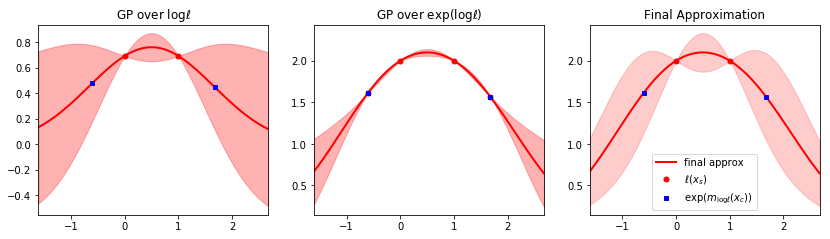

In [102]:
bq.plot()

In [103]:
print bq.Z_mean(), bq.Z_var()

0.853024353675 0.0162322866645


In [91]:
import bayesian_quadrature.gauss_c as gc

In [ ]:
gc.approx_int_int_K

In [100]:
bayesian_quadrature.gauss_c.approx_int_K(X,K,np.array([0.0,0.0]),)

TypeError: approx_int_K() takes exactly 5 positional arguments (4 given)